# Protocol Benchmarks

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import *
from glob import glob as list_files

In [36]:
files = list_files("../bench-results/*.csv")

dfs = []
for file in files:
    dfs.append(pd.read_csv(file, delimiter=";"))

df = pd.concat(dfs)
df["latency"] = df["latency"] / 1000
df

,name,op,args,send-time,receive-time,latency,unit
0,CLIENT1-iZH.8KcZkoRW,put,keyX1 valueX1,1663294064,1663297882,3.817942,µs
1,CLIENT1-iZH.8KcZkoRW,put,keyX2 valueX2,1663299010,1663302305,3.294563,µs
2,CLIENT1-iZH.8KcZkoRW,put,keyX3 valueX3,1663302366,1663305431,3.065254,µs
3,CLIENT1-iZH.8KcZkoRW,put,keyX4 valueX4,1663305501,1663309108,3.607817,µs
4,CLIENT1-iZH.8KcZkoRW,put,keyX5 valueX5,1663309250,1663312107,2.856982,µs
...,...,...,...,...,...,...,...
9995,CLIENT1,put,keyX9996 valueX9996,835220406,835230529,10.123268,µs
9996,CLIENT1,put,keyX9997 valueX9997,835230535,835238298,7.762436,µs
9997,CLIENT1,put,keyX9998 valueX9998,835238305,835246949,8.643639,µs
9998,CLIENT1,put,keyX9999 valueX9999,835246960,835256139,9.179674,µs


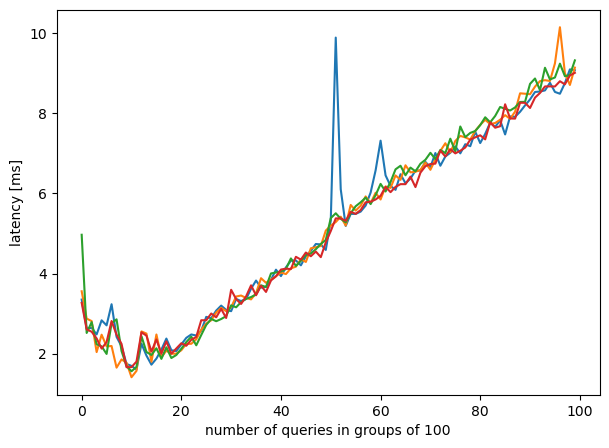

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

for name in df["name"].unique():
    grouped = df[df["name"] == name].groupby({x: x // 100 for x in range(len(df))})["latency"].mean().plot(ax=ax)
    
ax.set_xlabel("number of queries in groups of 100")
ax.set_ylabel("latency [ms]")

ax

plt.savefig(fname="latency.png", format="png")